In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KM
from matplotlib import pyplot as plt
from skfuzzy.cluster import cmeans

In [2]:
def target_to_color(target):
    if type(target) == np.ndarray:
        return (target[0], target[1], target[2])
    else:
        return "rgb"[target]

In [3]:
def plot_data(data, target, filename="fig.png"):
    plt.figure()
    plt.scatter(data[:,0], data[:,1], c=[target_to_color(t) for t in target])
    plt.savefig(filename)

In [4]:
def gen_data():
    iris = load_iris()
    pca = PCA(n_components=2)
    return pca.fit_transform(iris.data), iris.target

In [5]:
def main():
    data, target = gen_data()
    plot_data(data, target, filename="origin.png")

    km = KM(n_clusters=3)
    km_target = km.fit_predict(data)
    plot_data(data, km_target, filename="kmeans.png")

    for m in [1.5, 2, 3, 4, 5]:
        cm_result = cmeans(data.T, 3, m, 0.003, 10000)
        plot_data(data, cm_result[1].T, filename="cmeans_{0}.png".format(m))

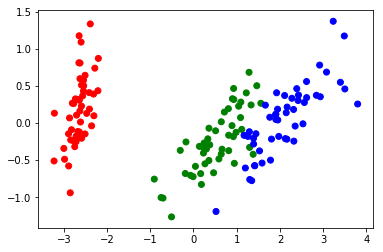

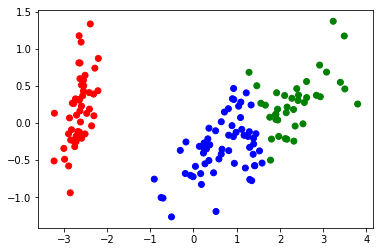

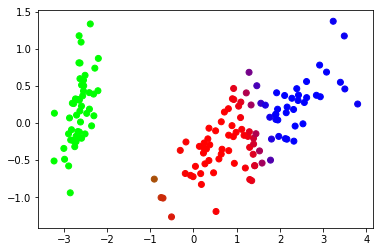

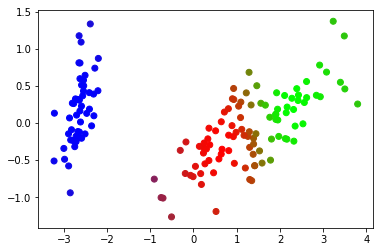

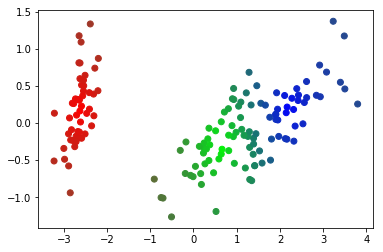

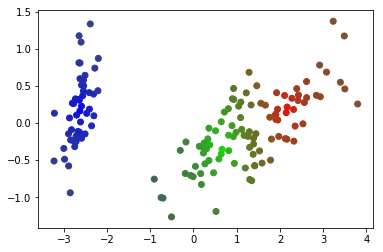

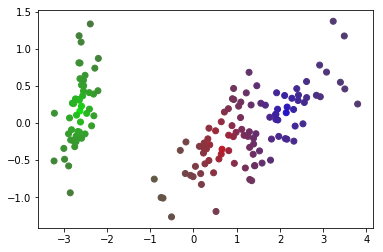

In [6]:
if __name__ == "__main__":
    main()